# (A) Identification of Candidate Datasets

**Dataset Number 1**
- Name / Source: PBQ-EDA, https://zenodo.org/records/16112261
- Course Topic: Decision Trees, Frequent Itemsets / Association Rules
  - Decision trees for predicting answer based on text only, text + environment
  - Frequent itemsets for analyzing environments
- Beyond Course Technique: Topic Modeling
  - Seeing what topics are tested, if enough spread exists
- Dataset Size / Structure: 424 questions-answer-environment records, each record contains a multiple-choice question, answer, environment item basket, and optional linked tuples/images
- Data Types: Categorical IDs, string text, variable-length categorical sequences, categorical labels, and nested string lists
- Target Variable(s): Gold Answer / Gold Answer Letter
- Licensing Constraints: Creative Commons Attribution 4.0

**Dataset Number 2**
- Name / Source: PokerBench, https://huggingface.co/datasets/RZ412/PokerBench
- Course Topic: Decision Trees, Text Mining / Embeddings, Frequent Itemsets
  - Decision trees to learn check / bet / raise / fold
  - Text mining / embeddings to represent pre-flop action or the flop texture
  - Frequent itemsets to check distribution of benchmark hands, potential bias or post-flop tendencies
- Beyond Course Technique: Chi-Squared Tests
  - Checking associations between correct decision and hero position
- Dataset Size / Structure: 500,000 hands, each hand contains text-encoded sequential play information, pot size, and GTO-approved play
- Data Types: Categorical sequences, tokens, numerics, categorical labels
- Target Variable(s): Correct decision (based on GTO solvers)
- Licensing Constraints: No limits

**Dataset Number 3**
- Name / Source: NFL Fantasy Data, https://www.kaggle.com/datasets/heefjones/nfl-fantasy-data-1970-2024
- Course Topic: Regression Decision Trees, Clustering
  - Regression decision trees to predict half-point PPR
  - Clustering to discover player profiles
- Beyond Course Technique: Principal Component Analysis
  - Reduce the feature space for related numeric stats
- Dataset Size / Structure: 29,369 player-season records, with each record containing identifiers, stats, and fantasy outcomes
- Data Types: Categorical, numeric, ordinal
- Target Variable(s): Half-Point PPR
- Licensing Constraints: Apache 2.0

# (B) Comparative Analysis of Datasets

<table>
  <tr>
    <th></th>
    <th>PBQ-EDA</th>
    <th>PokerBench</th>
    <th>NFL Fantasy Data</th>
  </tr>
  <tr>
    <td><b>Supported Data Mining Tasks (course)<b></td>
    <td>Decision Trees, Frequent Itemsets / Association Rules</td>
    <td>Decision Trees, Text Mining / Embeddings, Frequent Itemsets</td>
    <td>Regression Decision Trees, Clustering</td>
  </tr>
  <tr>
    <td><b>Supported Data Mining Tasks(external)<b></td>
    <td>Topic Modeling</td>
    <td>Chi-Squared Tests</td>
    <td>Principal Component Analysis</td>
  </tr>
  <tr>
    <td><b>Data Quality Issues<b></td>
    <td>Inconsistency in grammar and filler words, but overall a very consistent format. Well-designed benchmark.</td>
    <td>Possible invalid game states, but it is a very consistently formatted benchmark.</td>
    <td>Missing data on target points for new players. Duplicate player names due to multiple seasons. Very sparse due to most stats being position-dependent.</td>
  </tr>
  <tr>
    <td><b>Algorithmic Feasibility<b></td>
    <td>Small dataset (<500 entries), plus limited items should accomodate Apriori. Repeat items will require algorithmic adjustments. Decision trees based on text may be unfeasible however, since the vocabulary will be quite large. </td>
    <td>Text can be easily tokenized into categories for decision tree modeling. Size of game is constrained.</td>
    <td>Large dataset with many features may create slow runtimes. PCA may be required for algorithmic feasibility.</td>
  </tr>
  <tr>
    <td><b>Bias Considerations<b></td>
    <td>Sampling bias in questions produced by paid participants and curated by the study conductors.</td>
    <td>Hands designed in conjunction with professional players favoring GTO-play.</td>
    <td>Data is pre-cleaned, which may introduce minor bias.</td>
  </tr>
  <tr>
    <td><b>Ethical Considerations<b></td>
    <td>The data can be used to show the limitations of purely text-based LLMs, which could harm reputability of companies such as OpenAI.</td>
    <td>The data can be used to train poker models that can beat humans, potentially causing real money losses if playing online.</td>
    <td>Some players have been known to have emotional reactions to fantasy stats.</td>
  </tr>
</table>

I propose using decision trees on all my candidate datasets. However, the specific implementations would be quite different. The PBQ-EDA dataset would require creating a vocabulary, while the NFL Fantasy Data would involve regression.

The PBQ-EDA and PokerBench datasets are both benchmarks. As a result, they both exhibit high data quality. However, both come with bias considerations, since the data is curated for a specific use. Using either would require further data investigation to quantify the impact of this bias on downstream conclusions.

# (C) Dataset Selection

I am choosing to explore the PokerBench dataset; specifically, I am analyzing the 500k post flop training set. Even with just preliminary examination, I can already see 3 course topics (decision trees, text embeddings, and frequent itemsets) that could be applied to this data. This offers me a lot of flexibility and could lead to a variety of insights.

The course topics are also diverse in their use and implementation. Although the dataset is designed to test LLMs, I believe a decision tree could be a more explainable method of selecting the correct decision / target variable in a given spot.

Text embeddings could further support this; since cards have both an ordinal rank and a categorical suit, I anticipate the text can be tokenized and embedded in a meaningful way to enhance predictions.

Frequent itemsets can be used to analyze the legitimacy of the benchmark data. From reading about the context, I know that selection bias likely exists in the hands presented. This method can be used to explore the legitimacy of downstream conclusions.

Furthermore, the dataset should support Chi-Squared tests to see correlations between the correct play and a player's position. This additional beyond-course concept can look at the decision-making process from a new angle.

Overall, the game of poker is complex enough to support a variety of relevant data mining concepts. This particular dataset provides a large amount of data (500,000 samples) in a very clean format.

The data does not have a natural language component. This keeps the data very clean and easy to load, but it makes it much harder to read for anyone not well-versed in poker.

Furthermore, as previously discussed, the data is prone to selection bias due to it being crafted by a specific subset of the poker community, professional players. I believe this will be an interesting avenue to explore, but it will limit the applicability of conclusions to most of the poker community.

# (D) Exploratory Data Analysis

In [ ]:
# Loading

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Replace with your actual filename if different
df = pd.read_csv("postflop_500k_train_set_game_scenario_information.csv")

df.head()
df.info()

Saving postflop_500k_train_set_game_scenario_information.csv to postflop_500k_train_set_game_scenario_information.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          500000 non-null  int64 
 1   preflop_action      500000 non-null  object
 2   board_flop          500000 non-null  object
 3   board_turn          500000 non-null  object
 4   board_river         500000 non-null  object
 5   aggressor_position  500000 non-null  object
 6   postflop_action     500000 non-null  object
 7   evaluation_at       500000 non-null  object
 8   available_moves     500000 non-null  object
 9   pot_size            500000 non-null  int64 
 10  hero_position       500000 non-null  object
 11  holding             500000 non-null  object
 12  correct_decision    500000 non-null  object
dtypes: int64(2), object(11)
memory 

In [ ]:
# Basic Cleaning
df = df.rename(columns={"Unnamed: 0": "Index"})

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert pot size to numeric (just in case)
df["pot_size"] = pd.to_numeric(df["pot_size"], errors="coerce")

# Make sure categorical columns are strings
cat_cols = [
    "preflop_action", "board_flop", "board_turn", "board_river",
    "aggressor_position", "postflop_action", "evaluation_at",
    "hero_position", "holding", "correct_decision"
]

for col in cat_cols:
    df[col] = df[col].astype(str)

df.head()

,Index,preflop_action,board_flop,board_turn,board_river,aggressor_position,postflop_action,evaluation_at,available_moves,pot_size,hero_position,holding,correct_decision
0,0,HJ/2.0bb/BB/call,JcJh4s,4d,As,OOP,OOP_CHECK/IP_BET_1/OOP_CALL/dealcards/4d/OOP_C...,River,"['Check', 'Bet 17']",21,IP,AhKd,Check
1,1,SB/3.0bb/BB/call,6s8d7c,9s,3c,OOP,OOP_CHECK/IP_CHECK/dealcards/9s/OOP_BET_5/IP_R...,Turn,"['Fold', 'Call', 'Raise 41']",27,OOP,Tc9c,Call
2,2,UTG/2.0bb/CO/6.5bb/UTG/call,JcJh4s,4d,As,IP,OOP_CHECK/IP_BET_7/OOP_RAISE_16/IP_CALL/dealca...,Turn,"['Fold', 'Call']",151,IP,QsQh,Call
3,3,UTG/2.0bb/BTN/call,Th3s2d,5d,3c,OOP,OOP_CHECK/IP_CHECK/dealcards/5d/OOP_BET_6/IP_C...,River,"['Check', 'Bet 13']",17,IP,JcTc,Check
4,4,CO/2.3bb/BB/call,Ks7h2d,Jc,Qc,OOP,OOP_CHECK/IP_CHECK/dealcards/Jc/OOP_CHECK/IP_B...,River,"['Check', 'Bet 29']",39,IP,Ac5c,Bet 29


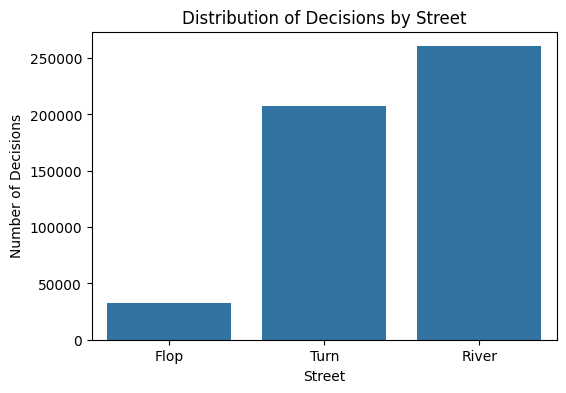

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="evaluation_at",
    order=["Flop","Turn","River"]
)
plt.title("Distribution of Decisions by Street")
plt.xlabel("Street")
plt.ylabel("Number of Decisions")
plt.show()


In [ ]:
ranks = {'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'T':10,'J':11,'Q':12,'K':13,'A':14}

def parse_holding(hand):
    r1, s1, r2, s2 = hand[0], hand[1], hand[2], hand[3]
    return pd.Series({
        "rank_high": max(ranks[r1], ranks[r2]),
        "rank_low": min(ranks[r1], ranks[r2]),
        "is_pair": r1 == r2,
        "is_suited": s1 == s2,
        "rank_gap": abs(ranks[r1] - ranks[r2])
    })

df = pd.concat([df, df["holding"].apply(parse_holding)], axis=1)

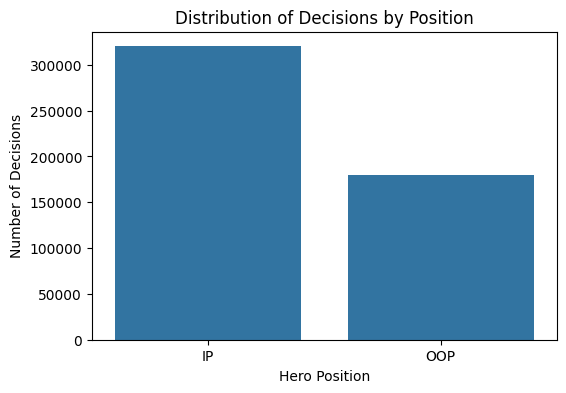

In [ ]:
df["hero_is_ip"] = (df["hero_position"] == "IP").astype(int)
df["hero_is_oop"] = (df["hero_position"] == "OOP").astype(int)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="hero_position", order=["IP","OOP"])
plt.title("Distribution of Decisions by Position")
plt.xlabel("Hero Position")
plt.ylabel("Number of Decisions")
plt.show()

In [ ]:
def flop_texture(flop):
    cards = [flop[i:i+2] for i in range(0, len(flop), 2)]
    ranks_only = [c[0] for c in cards]
    suits_only = [c[1] for c in cards]

    paired = len(set(ranks_only)) < 3
    two_tone = len(set(suits_only)) == 2
    monotone = len(set(suits_only)) == 1

    rank_values = sorted([ranks[r] for r in ranks_only])
    connected = max(rank_values) - min(rank_values) <= 4

    return pd.Series({
        "flop_paired": int(paired),
        "flop_two_tone": int(two_tone),
        "flop_monotone": int(monotone),
        "flop_connected": int(connected)
    })

df = pd.concat([df, df["board_flop"].apply(flop_texture)], axis=1)


In [ ]:
df["pot_bucket"] = pd.qcut(df["pot_size"], 4, labels=["Small", "Medium", "Large", "Huge"])

import pandas as pd

# Compute quartiles and get bin edges
bins, bin_edges = pd.qcut(df["pot_size"], 4, retbins=True)

print("Pot size quartile edges:")
print(bin_edges)

pot_labels = ["Small", "Medium", "Large", "Huge"]

for i, label in enumerate(pot_labels):
    print(f"{label}: {bin_edges[i]:.2f} → {bin_edges[i+1]:.2f}")



Pot size quartile edges:
[  4.  17.  33.  61. 176.]
Small: 4.00 → 17.00
Medium: 17.00 → 33.00
Large: 33.00 → 61.00
Huge: 61.00 → 176.00


In [ ]:
df["num_actions_postflop"] = df["postflop_action"].str.count("/") + 1


decision_bucket
Check                  0.250000
Call                   0.250000
Fold                   0.250000
Large Bet (75-100%)    0.102750
Overbet (100-150%)     0.079304
Medium Bet (50-75%)    0.032652
Jam (>150%)            0.031832
Small Bet (33-50%)     0.001764
Tiny Bet (<33%)        0.001698
Name: proportion, dtype: float64


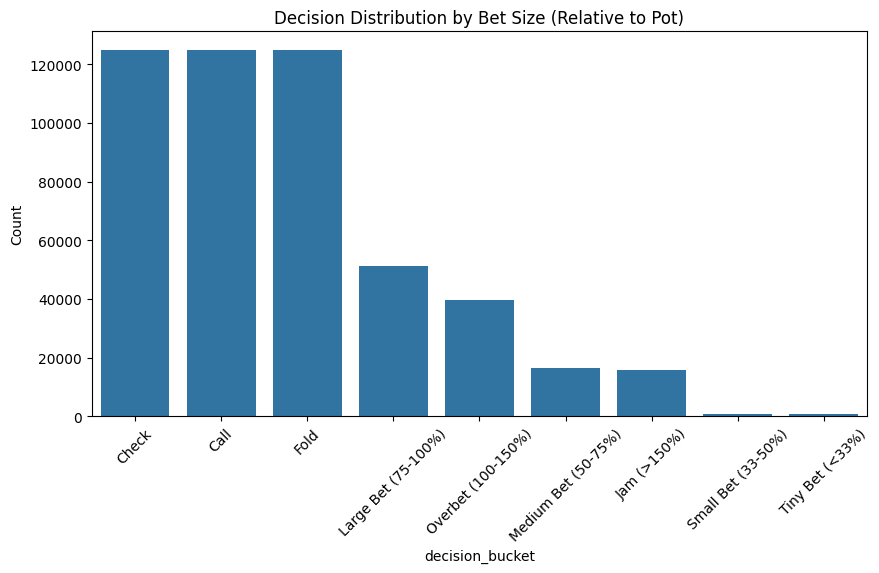

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

def extract_bet_size(decision):
    match = re.search(r'(\d+)', decision)
    return float(match.group(1)) if match else np.nan

df["bet_amount"] = df["correct_decision"].apply(extract_bet_size)
df["bet_pct_pot"] = df["bet_amount"] / df["pot_size"]

def size_bucket(row):
    if pd.isna(row["bet_pct_pot"]):
        return row["correct_decision"]  # Check / Fold stays as-is

    pct = row["bet_pct_pot"]

    if pct < 0.33:
        return "Tiny Bet (<33%)"
    elif pct < 0.5:
        return "Small Bet (33-50%)"
    elif pct < 0.75:
        return "Medium Bet (50-75%)"
    elif pct < 1.0:
        return "Large Bet (75-100%)"
    elif pct < 1.5:
        return "Overbet (100-150%)"
    else:
        return "Jam (>150%)"

df["decision_bucket"] = df.apply(size_bucket, axis=1)

bucket_counts = df["decision_bucket"].value_counts(normalize=True)

print(bucket_counts)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="decision_bucket", order=df["decision_bucket"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Decision Distribution by Bet Size (Relative to Pot)")
plt.ylabel("Count")
plt.show()

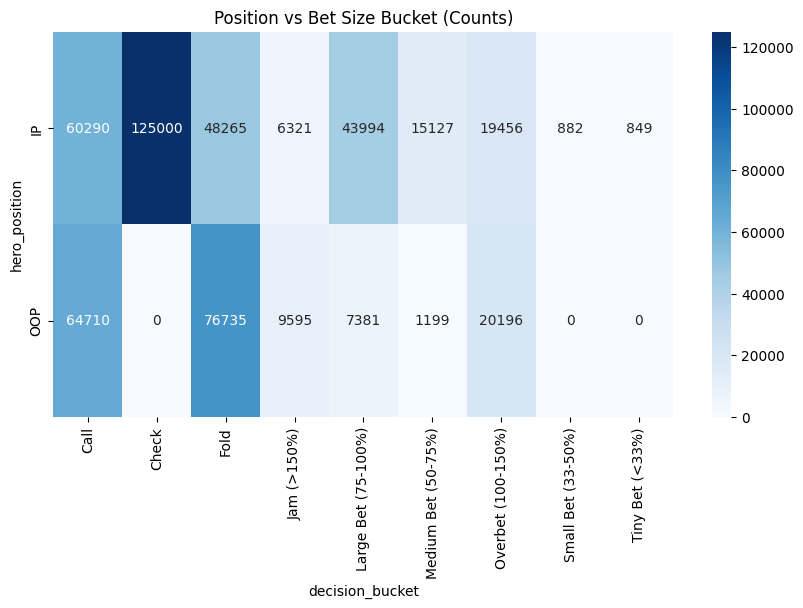

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(
    pd.crosstab(df["hero_position"], df["decision_bucket"]),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Position vs Bet Size Bucket (Counts)")
plt.show()


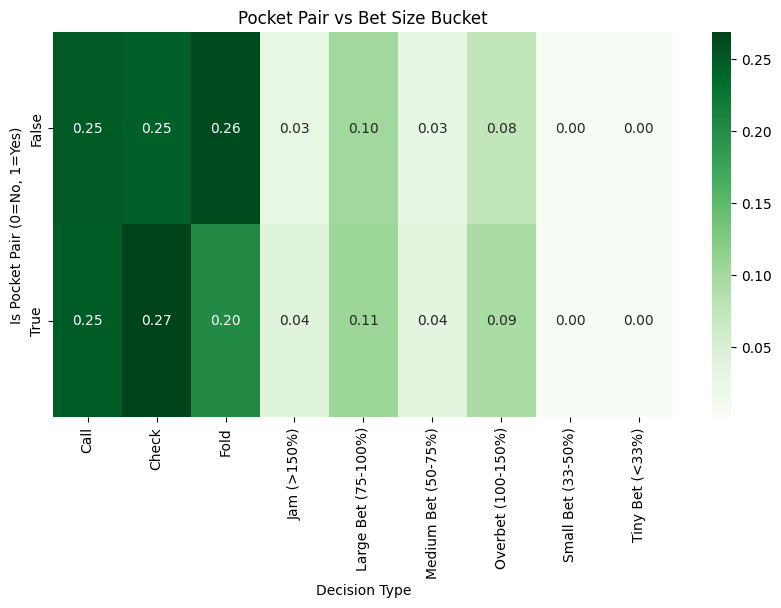

In [ ]:
pair_bucket_tab = pd.crosstab(
    df["is_pair"],
    df["decision_bucket"],
    normalize="index"
)

pair_bucket_tab

plt.figure(figsize=(10,5))
sns.heatmap(pair_bucket_tab, annot=True, fmt=".2f", cmap="Greens")
plt.title("Pocket Pair vs Bet Size Bucket")
plt.ylabel("Is Pocket Pair (0=No, 1=Yes)")
plt.xlabel("Decision Type")
plt.show()


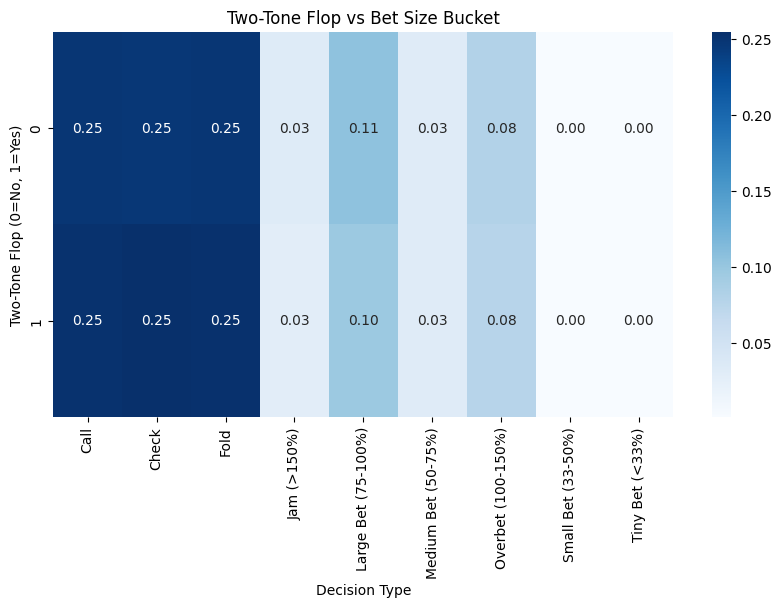

In [ ]:
two_tone_tab = pd.crosstab(
    df["flop_two_tone"],
    df["decision_bucket"],
    normalize="index"
)

two_tone_tab

plt.figure(figsize=(10,5))
sns.heatmap(two_tone_tab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Two-Tone Flop vs Bet Size Bucket")
plt.ylabel("Two-Tone Flop (0=No, 1=Yes)")
plt.xlabel("Decision Type")
plt.show()


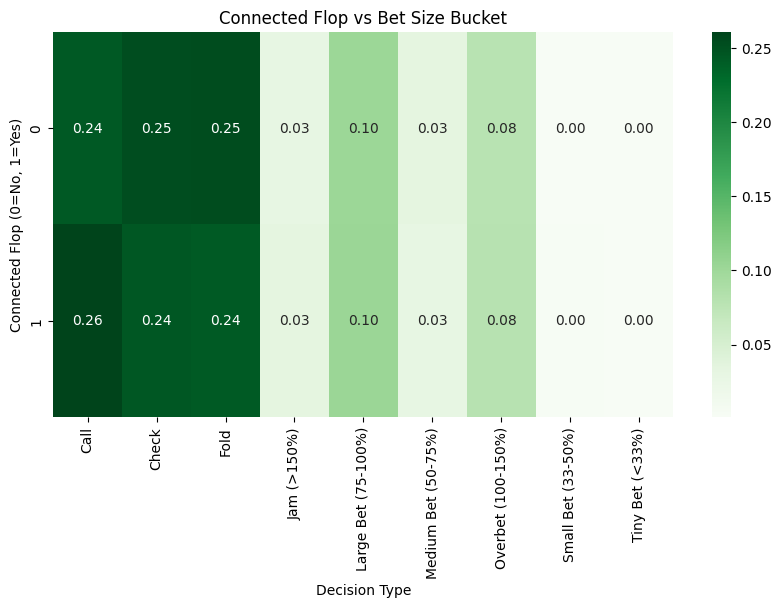

In [ ]:
connected_tab = pd.crosstab(
    df["flop_connected"],
    df["decision_bucket"],
    normalize="index"
)

connected_tab

plt.figure(figsize=(10,5))
sns.heatmap(connected_tab, annot=True, fmt=".2f", cmap="Greens")
plt.title("Connected Flop vs Bet Size Bucket")
plt.ylabel("Connected Flop (0=No, 1=Yes)")
plt.xlabel("Decision Type")
plt.show()


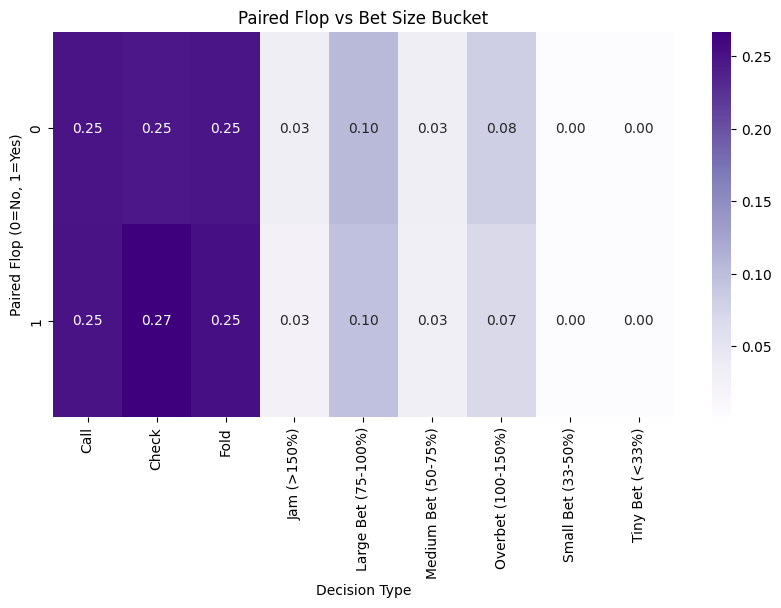

In [ ]:
paired_tab = pd.crosstab(
    df["flop_paired"],
    df["decision_bucket"],
    normalize="index"
)

paired_tab

plt.figure(figsize=(10,5))
sns.heatmap(paired_tab, annot=True, fmt=".2f", cmap="Purples")
plt.title("Paired Flop vs Bet Size Bucket")
plt.ylabel("Paired Flop (0=No, 1=Yes)")
plt.xlabel("Decision Type")
plt.show()


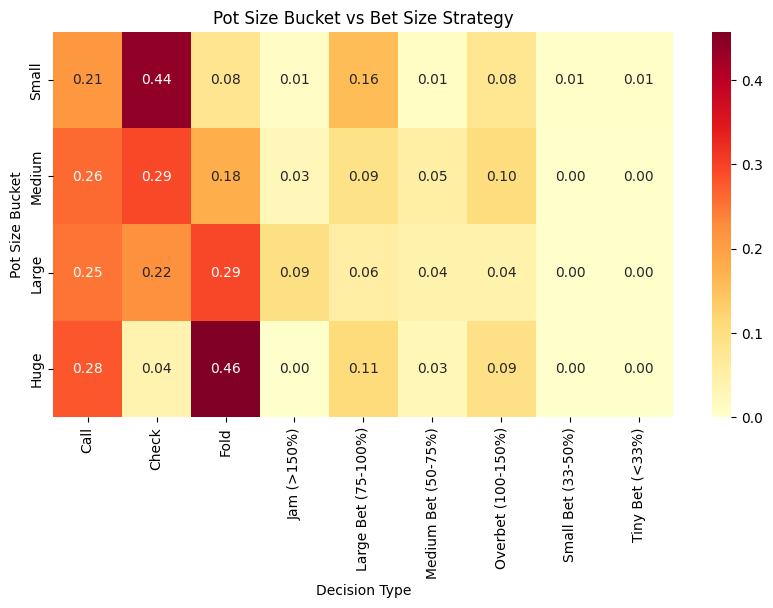

In [ ]:
pot_bucket_tab = pd.crosstab(
    df["pot_bucket"],
    df["decision_bucket"],
    normalize="index"
)

pot_bucket_tab

plt.figure(figsize=(10,5))
sns.heatmap(pot_bucket_tab, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Pot Size Bucket vs Bet Size Strategy")
plt.ylabel("Pot Size Bucket")
plt.xlabel("Decision Type")
plt.show()



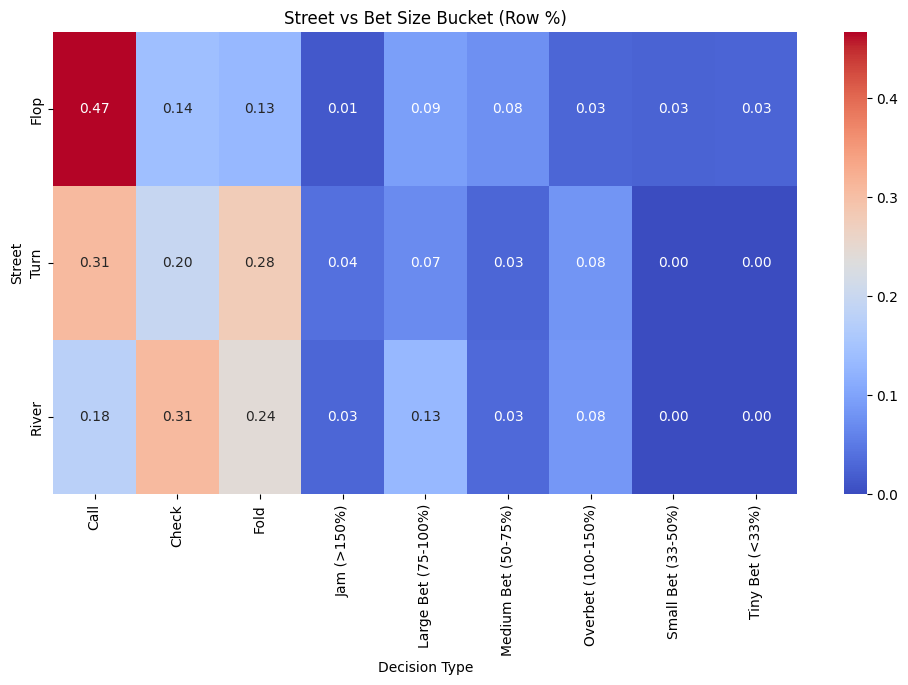

In [ ]:
street_order = ["Flop", "Turn", "River"]

street_bucket_tab = pd.crosstab(
    df["evaluation_at"],
    df["decision_bucket"],
    normalize="index"
).reindex(street_order)

street_bucket_tab

plt.figure(figsize=(12,6))
sns.heatmap(street_bucket_tab, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Street vs Bet Size Bucket (Row %)")
plt.ylabel("Street")
plt.xlabel("Decision Type")
plt.show()


In my exploratory data analysis, I chose to explore the distribution of columns such as evaluation street and hero position to see how balanced the data was. The data was unbalanced, which could represent data bias or a natural result of poker play. To investigate further, I would be interested in statistical analysis methods, parsing the text to ensure alignment of hands / actions with the rules of poker, and the distribution of cards.

I also chose to explore the relationship of factors such as position, flop texture, hand texture, and pot size with the correct decision determined by GTO play. Not only did this allow me to get a sense for the strategies implemented, it showed me the feasibility of exploring a decision tree in later analysis.

# (E) Initial Insights / Direction

I noticed that checking, calling, or folding, which represent passive play, was preferred as the correct decision 75% of the time. I hypothesize that since raising or betting are more rare, a good split when constructing a decision tree should be possible.

I notice that medium or bigger bets (at least 50% the size of the pot) are massively preferred when betting. I hypothesize that since small / tiny bets are more rare, a good split when constructing a decision tree should be possible.

I notice that out of position players should fold / call more than in position players. This aligns with my understanding of positional advantage, and suggests that position may be a good split while constructing a decision tree.

I notice that having a pocket pair and the flop texture does not influence the correct decision often. This makes sense given that the dataset focuses on evaluations that occur on later streets, making pre-flop / flop textures less relevant. I hypothesize this information will be less helpful in constructing a decision tree.

I notice that folding in huge pots and checking in small pots is preferred. This again represents passive play. I hypothesize that pot size may also be a good split when constructing a decision tree.

I notice that calling on the flop and checking on the river are common actions, which suggests a low variance play style that excercises pot control. I hypothesize that evaluation street may also be a good split when constructing a decision tree.

I notice that the dataset focuses on in position evaluations more than out of position. This suggests that more hands should be taken post-flop in position.

Overall, these observations make me wonder how I can best optimize a decision tree to balance low entropy against the number of splits, so that a player could have the easiest time remembering optimal play.

The uneven distribution of evaluation street and position makes me wonder if the dataset is biased or capturing a phenomenon of poker. If possible, a statistic measure to assess this would provide good direction.

The irrelevance of flop texture and pocket pairs makes me wonder if text embeddings will be useful in predicting correct play. I wonder if players get too focused on embedding this visual information while playing, rather than focusing on more intangible information such as pot size and position.

# (F) GitHub Portfolio

Link: https://github.com/jrlehan/Data_Mining_Project

# Collaborations

Resources:

```
On my honor, I declare the following resources:
1. Collaborators:
- N/A

2. Web Sources:
- https://www.kaggle.com/datasets/heefjones/nfl-fantasy-data-1970-2024

3. AI Tools:
- I asked ChatGPT to help me display a table within a Jupyter notebook.
- I asked ChatGPT to help load my csv and perform exploratory data analysis. I reprompted it to create decision buckets that were easier to explore than every possible bet / raise decision. I also reprompted it to display a few more distributions.
- I asked ChatGPT to help me write a README for my project given that I was only in the EDA phase.

4. Citations:
- Miles Shelton, Nate Wingerd, Kritim K Rijal, Ayush Garg, Adelina Gutic, Brett Barnes, and Catherine Finegan-Dollak. "Grounded, or a Good Guesser? A Per-Question Balanced Dataset to Separate Blind from Grounded Models for Embodied Question Answering." Proceedings of the 63rd Annual Meeting of the Association for Computational Linguistics, 2025, Vienna, Austria.
- Richard Zhuang, Akshat Gupta, Richard Yang, Aniket Rahane, Zhengyu Li, and Gopala Anumanchipalli. “PokerBench: Training Large Language Models to Become Professional Poker Players.” Proceedings of the AAAI Conference on Artificial Intelligence (AAAI), 2025.
```